In [2]:
# Importing Libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error 

In [3]:
# Importing Data
df = pd.read_csv(r'C:\Users\acer\Downloads\Salary_Data.csv')
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [5]:
df.describe()

,Age,Years of Experience,Salary
count,6702.000000,6701.000000,6699.000000
mean,33.620859,8.094687,115326.964771
std,7.614633,6.059003,52786.183911
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


In [6]:
df.isnull().sum()

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df['Job Title'].value_counts()

Software Engineer             518
Data Scientist                453
Software Engineer Manager     376
Data Analyst                  363
Senior Project Engineer       318
                             ... 
Account Manager                 1
Help Desk Analyst               1
Senior Training Specialist      1
Junior Web Designer             1
Software Project Manager        1
Name: Job Title, Length: 191, dtype: int64

In [9]:
# Reducing Job titles by omitting titles with less than 25 counts
job_title_count = df['Job Title'].value_counts()
job_title_edited = job_title_count[job_title_count<=25]
job_title_edited.count()

142

In [10]:
# Omitting titles with less than 20 counts
df['Job Title'] = df['Job Title'].apply(lambda x: 'Others' if x in job_title_edited else x )
df['Job Title'].nunique()

50

In [11]:
df['Education Level'].value_counts()

Bachelor's Degree    2265
Master's Degree      1572
PhD                  1368
Bachelor's            756
High School           448
Master's              288
phD                     1
Name: Education Level, dtype: int64

In [12]:
# Combining repeating values of education level
df['Education Level'].replace(["Bachelor's Degree","Master's Degree","phD"],["Bachelor's","Master's","PhD"],inplace=True)
df['Education Level'].value_counts()

Bachelor's     3021
Master's       1860
PhD            1369
High School     448
Name: Education Level, dtype: int64

In [13]:
df['Gender'].value_counts()

Male      3671
Female    3013
Other       14
Name: Gender, dtype: int64

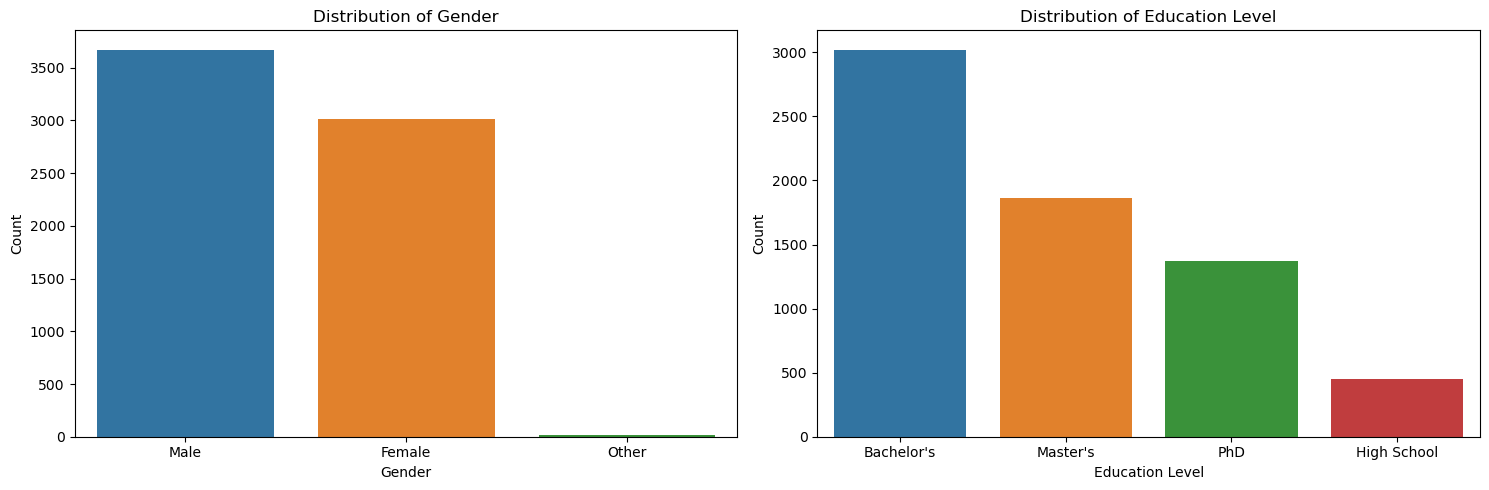

In [14]:
# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Plot the count of data points for each gender category in the first subplot
sns.countplot(x='Gender', data=df, ax=ax[0])

# Plot the count of data points for each education level category in the second subplot
sns.countplot(x='Education Level', data=df, ax=ax[1])

# Add labels and titles for the subplots
ax[0].set_xlabel('Gender')
ax[0].set_ylabel('Count')
ax[0].set_title('Distribution of Gender')

ax[1].set_xlabel('Education Level')
ax[1].set_ylabel('Count')
ax[1].set_title('Distribution of Education Level')

# Show the plots
plt.tight_layout()
plt.show()

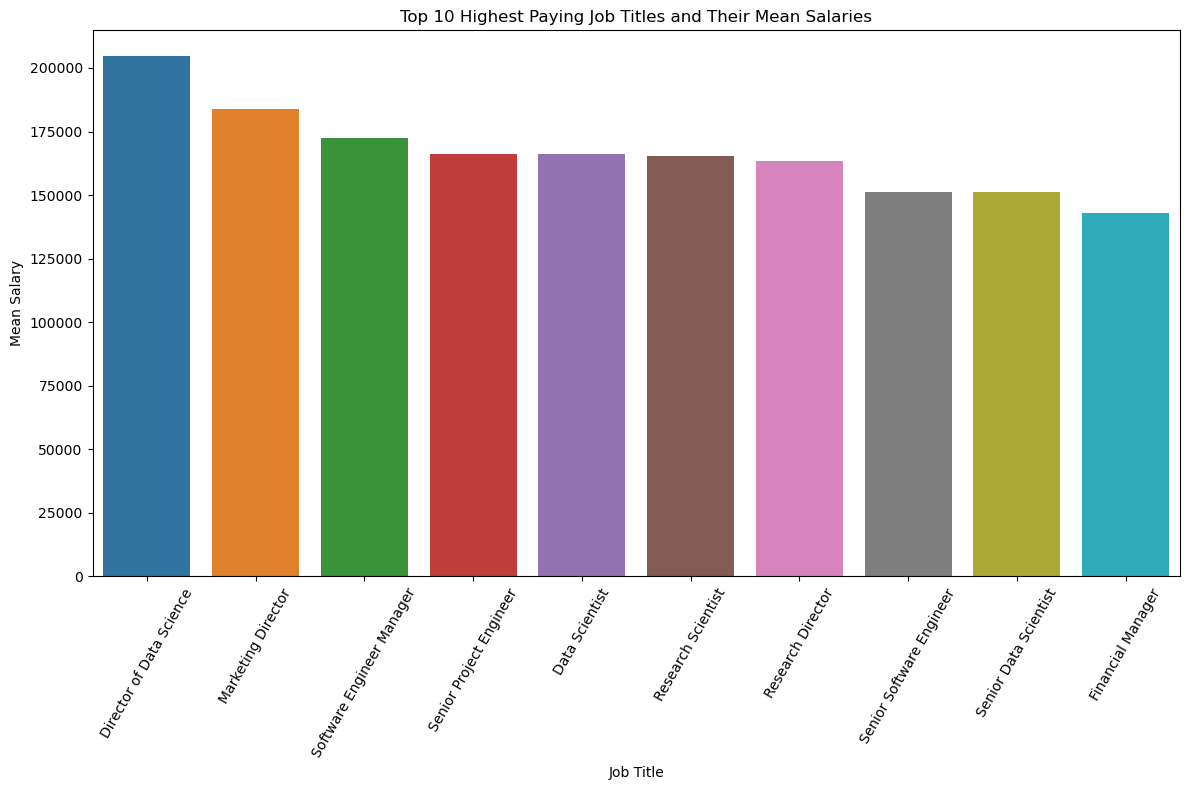

In [35]:
# Get the top 10 job titles with the highest mean salary
top_10_highest_paying_jobs = df.groupby('Job Title')['Salary'].mean().nlargest(10)

# Create a single bar plot for the top 10 highest paying job titles and their mean salaries
plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_highest_paying_jobs.index, y=top_10_highest_paying_jobs.values)

# Customize the plot
plt.xlabel('Job Title')
plt.ylabel('Mean Salary')
plt.title('Top 10 Highest Paying Job Titles and Their Mean Salaries')
plt.xticks(rotation=60)  # Rotate x-axis labels if needed

# Show the plot
plt.tight_layout()
plt.show()


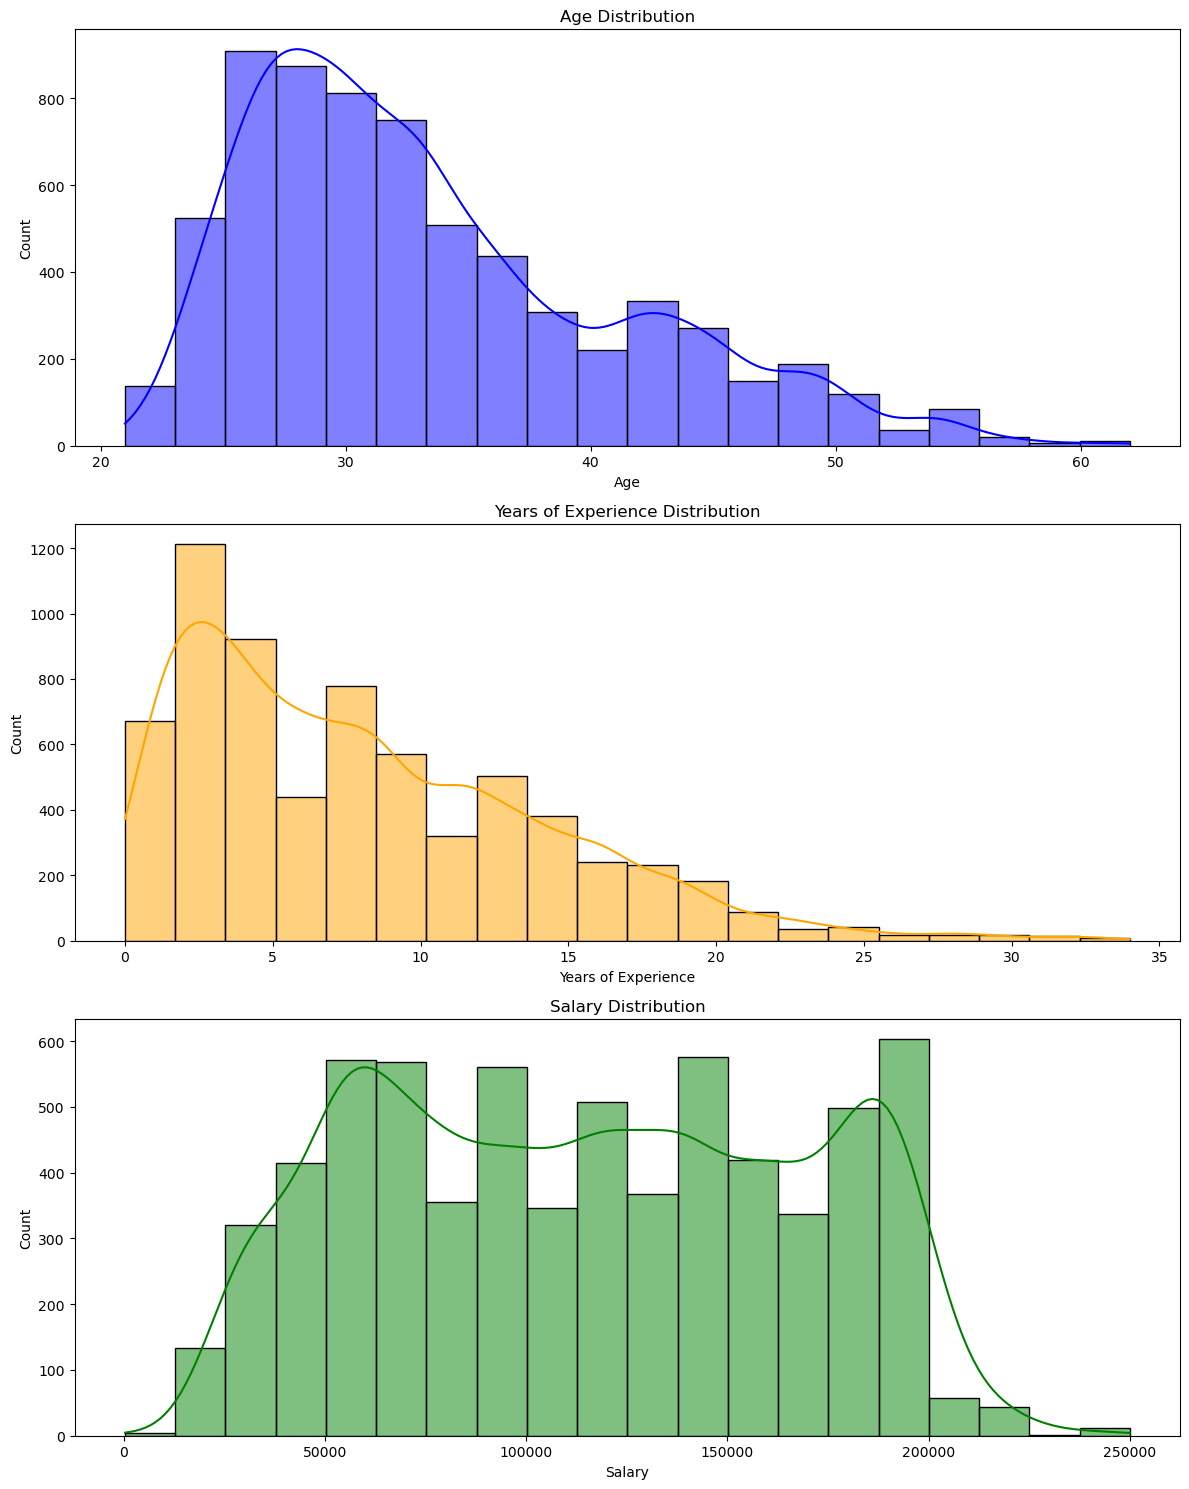

In [37]:
# Create a figure with three subplots
fig, ax = plt.subplots(3, 1, figsize=(12, 15))

# Create a histogram of Age in the first subplot
sns.histplot(df['Age'], ax=ax[0], bins=20, color='blue', kde=True)
ax[0].set_title('Age Distribution')
ax[0].set_xlabel('Age')

# Create a histogram of Years of Experience in the second subplot
sns.histplot(df['Years of Experience'], ax=ax[1], bins=20, color='orange', kde=True)
ax[1].set_title('Years of Experience Distribution')
ax[1].set_xlabel('Years of Experience')

# Create a histogram of Salary in the third subplot
sns.histplot(df['Salary'], ax=ax[2], bins=20, color='green', kde=True)
ax[2].set_title('Salary Distribution')
ax[2].set_xlabel('Salary')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

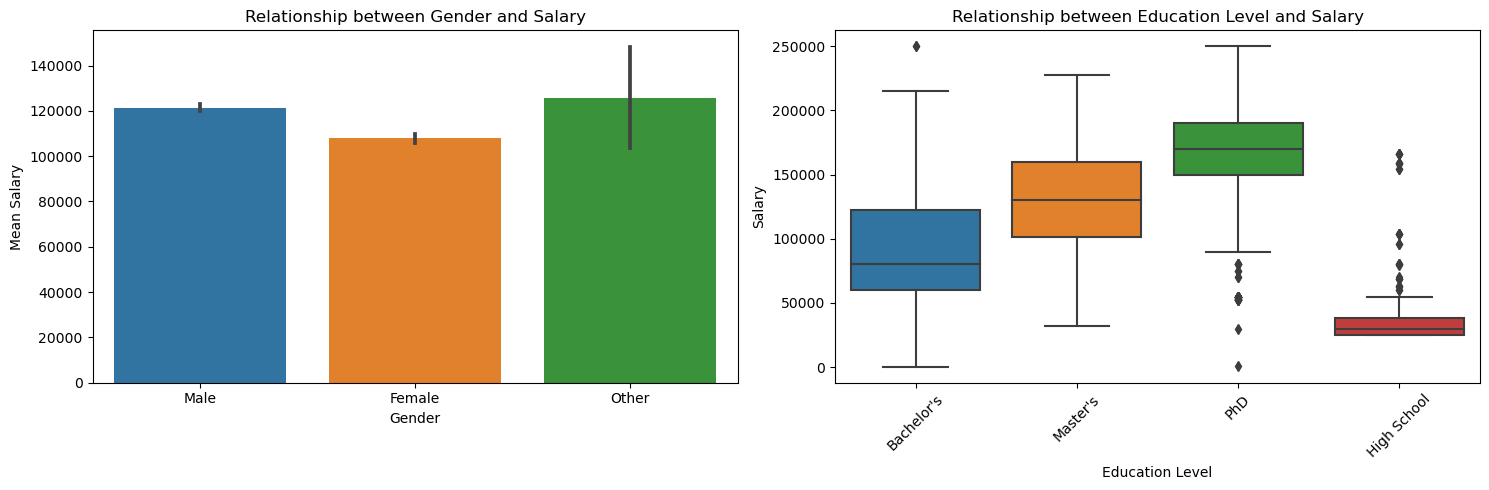

In [44]:
# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Create a bar plot for the relationship between Gender and Salary in the first subplot
sns.barplot(x='Gender', y='Salary', data=df, ax=ax[0])
ax[0].set(title='Relationship between Gender and Salary', xlabel='Gender', ylabel='Mean Salary')

# Create a box plot for the relationship between Education Level and Salary in the second subplot
sns.boxplot(x='Education Level', y='Salary', data=df, ax=ax[1])
ax[1].set(title='Relationship between Education Level and Salary', xlabel='Education Level', ylabel='Salary')

# Rotate x-axis labels in the second subplot for better readability
ax[1].tick_params(axis='x', rotation=45)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

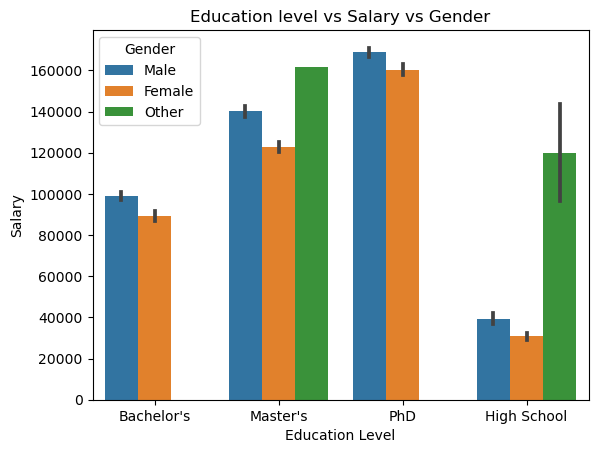

In [49]:
sns.barplot(x='Education Level',y='Salary',data=df,hue='Gender').set(title='Education level vs Salary vs Gender')
plt.show()

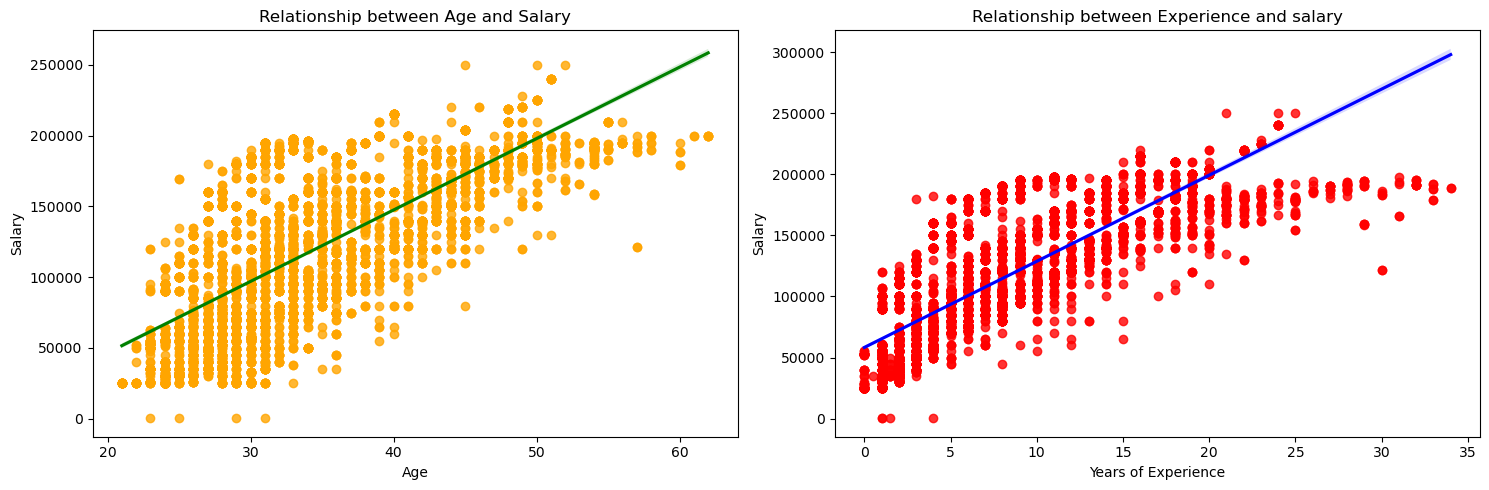

In [61]:
# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Scatter plot for relationship between age and salary
sns.regplot(x='Age',y='Salary',data=df, scatter_kws={'color':'orange'}, line_kws={'color':'green'}, ax=ax[0])
ax[0].set(title='Relationship between Age and Salary')

# Scatter plot for relationship between experience and salary
sns.regplot(x='Years of Experience',y='Salary',data=df, scatter_kws={'color':'red'}, line_kws={'color':'blue'}, ax=ax[1])
ax[1].set(title='Relationship between Experience and salary')

plt.tight_layout()
plt.show()

In [72]:
# detecting the outliers in salary column using IQR method
Q1 = df.Salary.quantile(0.25) # First Quartile
Q3 = df.Salary.quantile(0.75) # Third Quartile

# Caltulation Interquartile
IQR = Q3-Q1

# Deetecting outliers lying 1.5x of IQR above and below Q1 and Q3 resp
lower = Q1-1.5*IQR
upper = Q3+1.5*IQR

In [73]:
df[df.Salary>upper]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary


In [75]:
df[df.Salary<lower]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
